In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt


2025-02-08 13:00:30.061409: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-08 13:00:30.062112: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-08 13:00:30.066213: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-08 13:00:30.075353: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738999830.090857   23429 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738999830.09

In [2]:
import os
print("current working directory: ", os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir,"dataset","Train")
test_path = os.path.join(curr_dir,"dataset","Test")
valid_path = os.path.join(curr_dir,"dataset","Valid")

current working directory:  /home/badri/Project/intern/POTATO-DISEASE-PROJECT


In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle= True,
        interpolation="bilinear",


)

Found 900 files belonging to 3 classes.


2025-02-08 09:46:19.945640: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
        interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [6]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding="same", activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding="same", activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

/home/badri/Project/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

In [8]:
cnn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.3819 - loss: 1.2816 - val_accuracy: 0.5500 - val_loss: 0.9080
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5938 - loss: 0.8180 - val_accuracy: 0.6133 - val_loss: 0.9149
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6645 - loss: 0.6968 - val_accuracy: 0.8067 - val_loss: 0.4380
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8486 - loss: 0.3701 - val_accuracy: 0.6533 - val_loss: 0.8339
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.7805 - loss: 0.5886 - val_accuracy: 0.8533 - val_loss: 0.3473
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8773 - loss: 0.2508 - val_accuracy: 0.8933 - val_loss: 0.2322
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9474 - loss: 0.1609 - val_accuracy: 0.9100 - val_loss: 0.1945
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9561 - loss: 0.1115 - val_accuracy: 0.9400 - val_loss:

In [10]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Traininng accuracy:',train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 260ms/step - accuracy: 0.9778 - loss: 0.0584
Traininng accuracy: 0.9766666889190674


In [11]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:',val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 272ms/step - accuracy: 0.9409 - loss: 0.1490
Validation accuracy: 0.9399999976158142


In [12]:
cnn.save('trained_plant_disease_model.keras')

In [13]:
training_history.history

{'accuracy': [0.4077777862548828,
  0.6466666460037231,
  0.7277777791023254,
  0.8788889050483704,
  0.8066666722297668,
  0.903333306312561,
  0.9433333277702332,
  0.9611111283302307,
  0.9188888669013977,
  0.9711111187934875],
 'loss': [1.1499258279800415,
  0.741595983505249,
  0.6036143898963928,
  0.3133646845817566,
  0.4773738980293274,
  0.2186223417520523,
  0.1565197855234146,
  0.10816959291696548,
  0.24300403892993927,
  0.07643724977970123],
 'val_accuracy': [0.550000011920929,
  0.6133333444595337,
  0.8066666722297668,
  0.653333306312561,
  0.8533333539962769,
  0.8933333158493042,
  0.9100000262260437,
  0.9399999976158142,
  0.8966666460037231,
  0.9399999976158142],
 'val_loss': [0.9079983234405518,
  0.9148608446121216,
  0.4379701614379883,
  0.8339390158653259,
  0.34726887941360474,
  0.23216906189918518,
  0.1945110410451889,
  0.1586451530456543,
  0.2686980068683624,
  0.1615755707025528]}

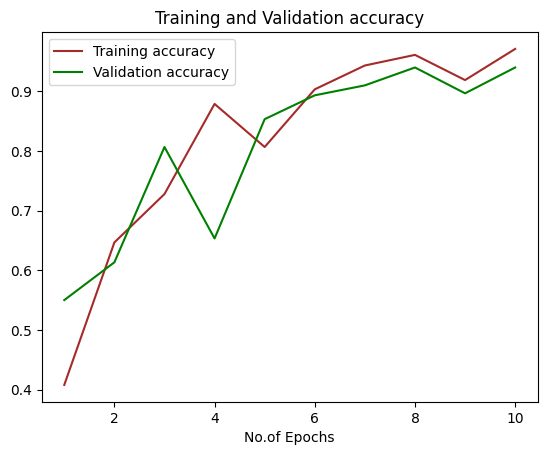

In [14]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], color="brown",label = 'Training accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color="green",label = 'Validation accuracy')
plt.xlabel('No.of Epochs')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()